In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-prices/laptop_prices.csv


In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/laptop-prices/laptop_prices.csv')

In [4]:
df

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [6]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [7]:
df.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

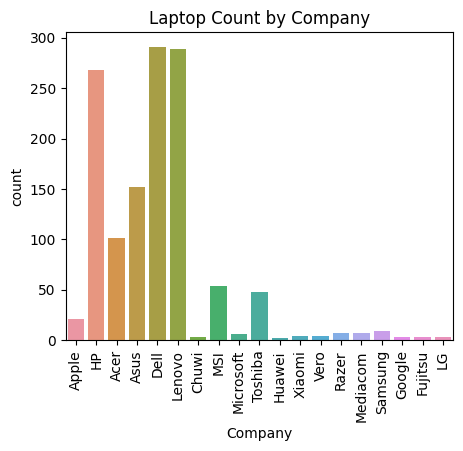

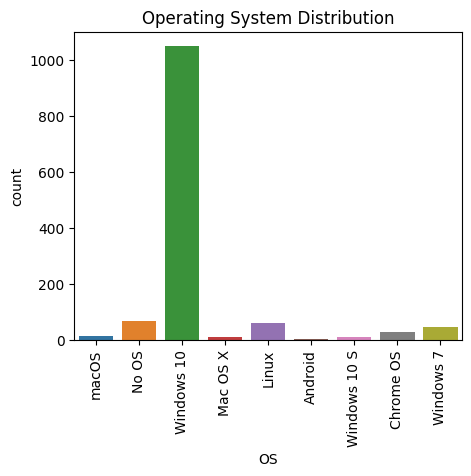

In [8]:
# Distribution of companies
plt.figure(figsize=(5, 4))
sns.countplot(x='Company', data=df)
plt.xticks(rotation=90)
plt.title('Laptop Count by Company')
plt.show()

# OS distribution
plt.figure(figsize=(5, 4))
sns.countplot(x='OS', data=df)
plt.xticks(rotation=90)
plt.title('Operating System Distribution')
plt.show()


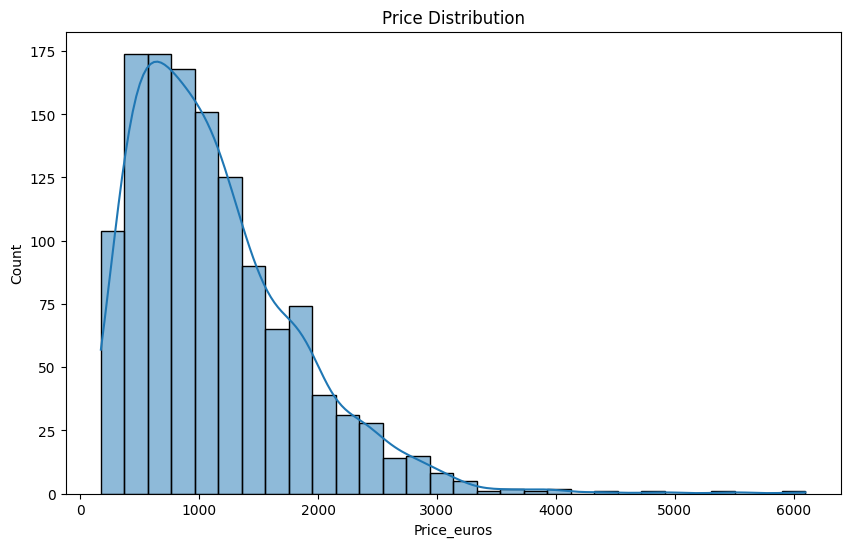

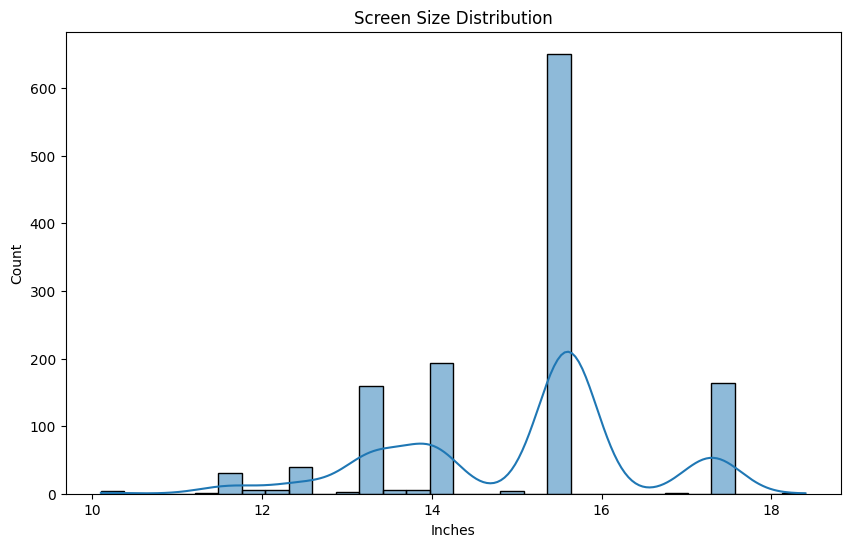

In [9]:
# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_euros'], kde=True, bins=30)
plt.title('Price Distribution')
plt.show()

# Distribution of laptop screen size
plt.figure(figsize=(10, 6))
sns.histplot(df['Inches'], kde=True, bins=30)
plt.title('Screen Size Distribution')
plt.show()


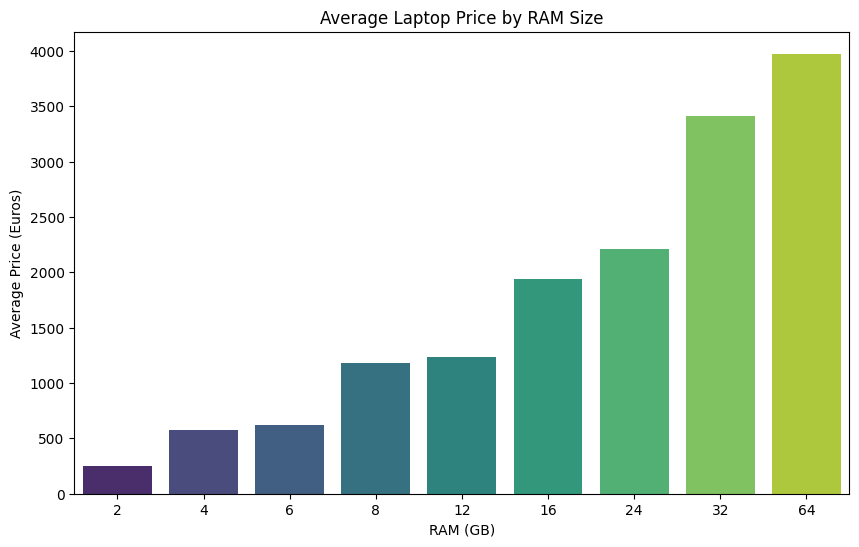

In [10]:
# Group by RAM and calculate average price
ram_price_avg = df.groupby('Ram')['Price_euros'].mean().reset_index()

# Barplot to show average price for each RAM category
plt.figure(figsize=(10, 6))
sns.barplot(x='Ram', y='Price_euros', data=ram_price_avg, palette='viridis')
plt.title('Average Laptop Price by RAM Size')
plt.xlabel('RAM (GB)')
plt.ylabel('Average Price (Euros)')
plt.show()


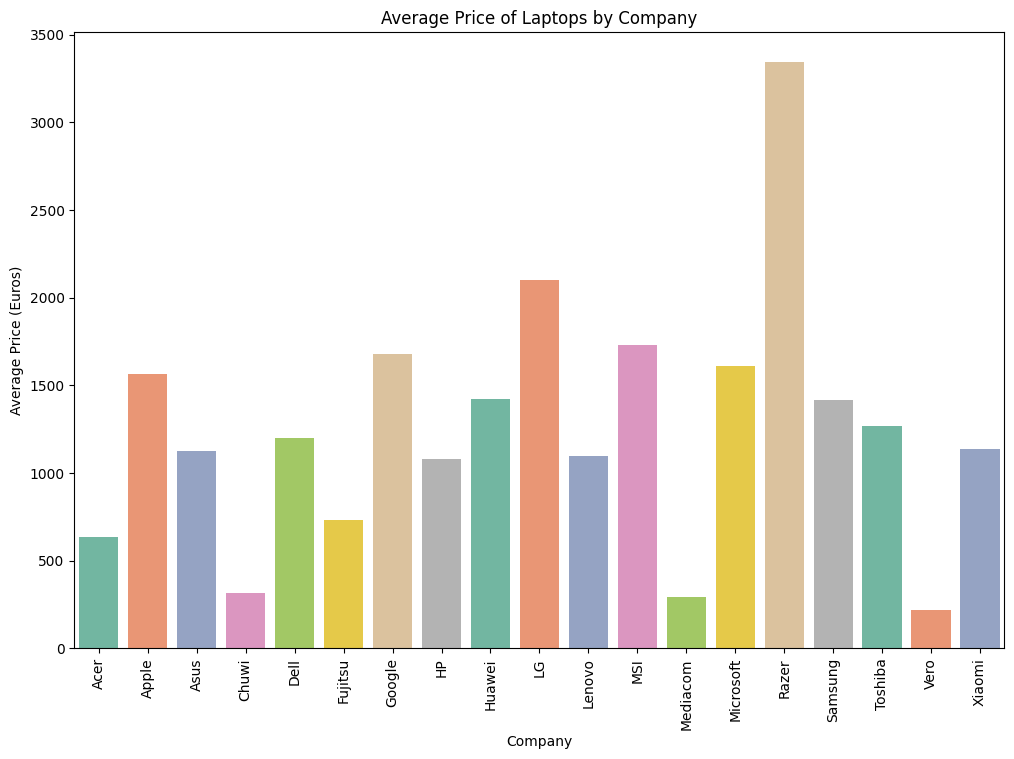

In [11]:
# Group by company and calculate average price
company_price_avg = df.groupby('Company')['Price_euros'].mean().reset_index()

# Barplot to show average price for each company
plt.figure(figsize=(12, 8))
sns.barplot(x='Company', y='Price_euros', data=company_price_avg, palette='Set2')
plt.xticks(rotation=90)
plt.title('Average Price of Laptops by Company')
plt.xlabel('Company')
plt.ylabel('Average Price (Euros)')
plt.show()


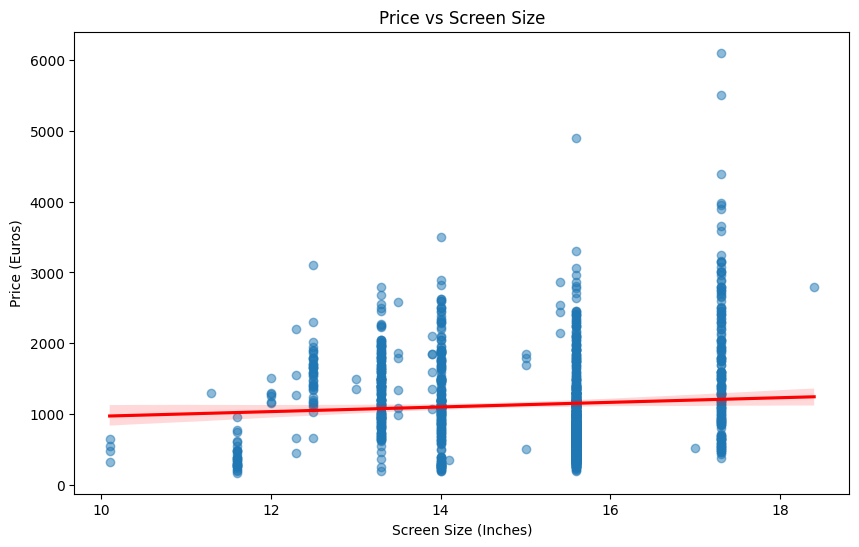

In [12]:
# Scatter plot with regression line for price vs screen size
plt.figure(figsize=(10, 6))
sns.regplot(x='Inches', y='Price_euros', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Price vs Screen Size')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Price (Euros)')
plt.show()


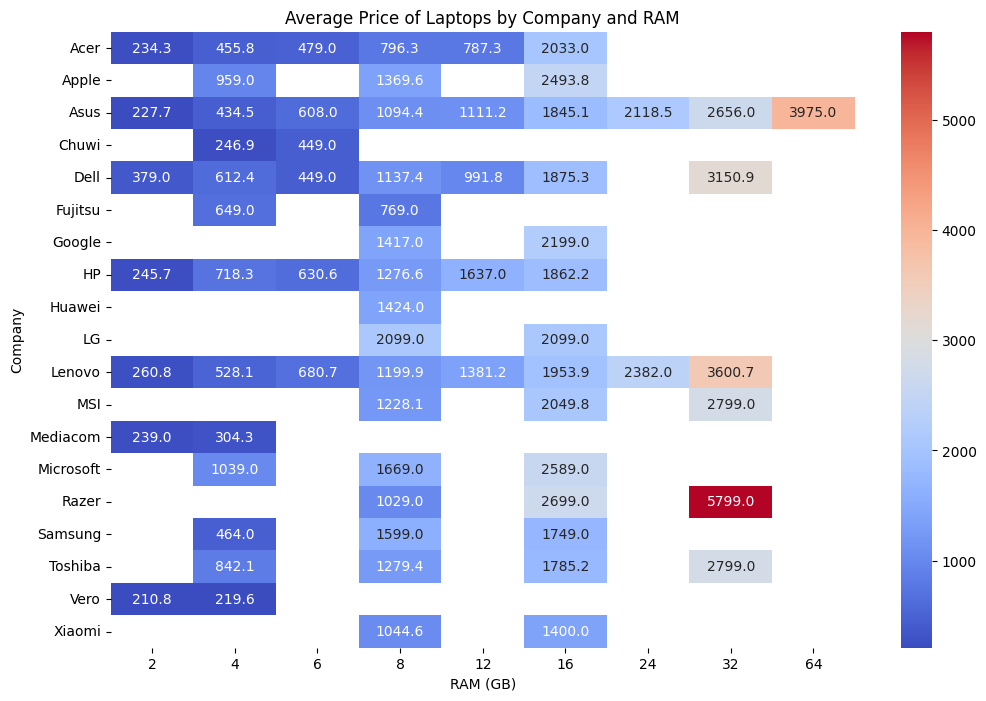

In [13]:
# Create a pivot table of average price by RAM and Company
ram_company_pivot = df.pivot_table(values='Price_euros', index='Company', columns='Ram', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ram_company_pivot, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Average Price of Laptops by Company and RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Company')
plt.show()


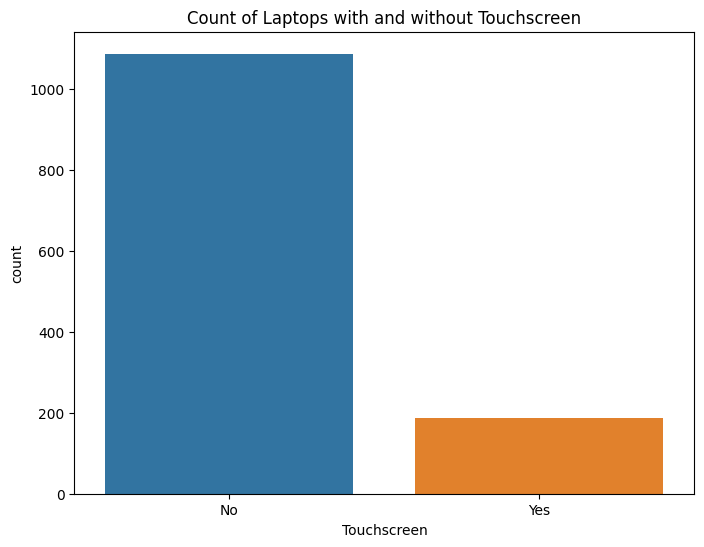

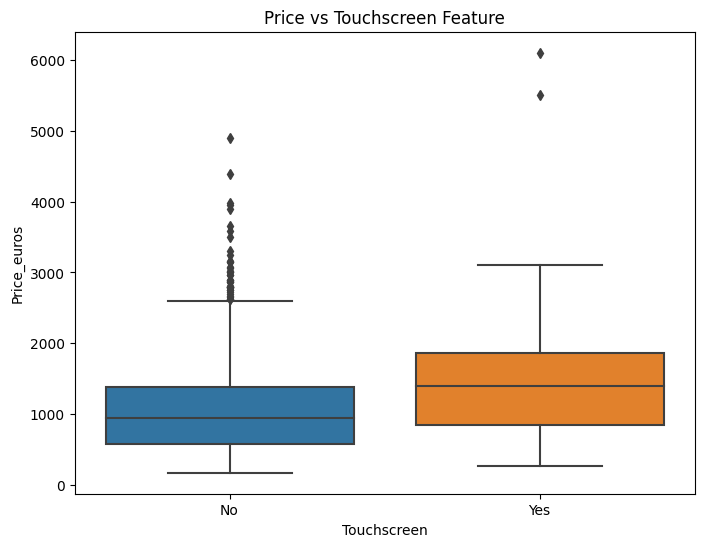

In [14]:
# Count of Touchscreen Laptops
plt.figure(figsize=(8, 6))
sns.countplot(x='Touchscreen', data=df)
plt.title('Count of Laptops with and without Touchscreen')
plt.show()

# Price Distribution based on Touchscreen
plt.figure(figsize=(8, 6))
sns.boxplot(x='Touchscreen', y='Price_euros', data=df)
plt.title('Price vs Touchscreen Feature')
plt.show()


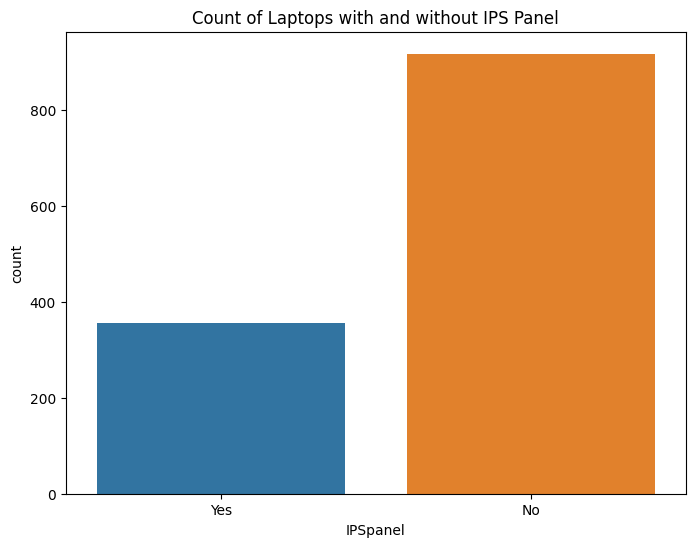

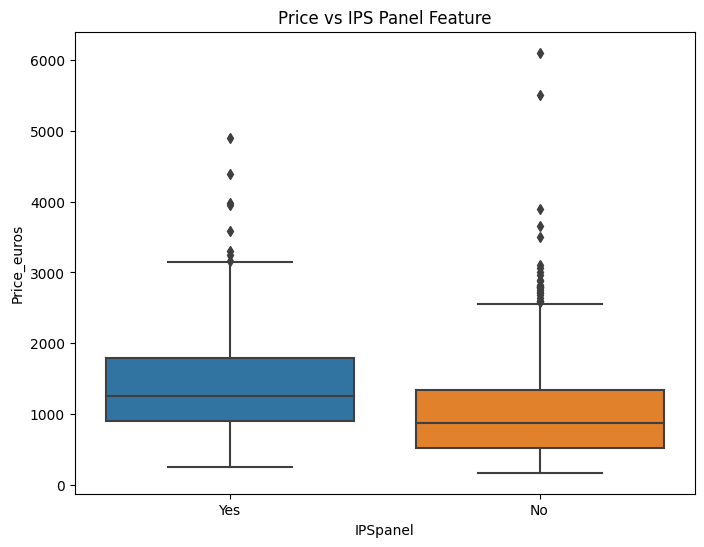

In [15]:
# Count of IPS Panel Laptops
plt.figure(figsize=(8, 6))
sns.countplot(x='IPSpanel', data=df)
plt.title('Count of Laptops with and without IPS Panel')
plt.show()

# Price Distribution based on IPS Panel
plt.figure(figsize=(8, 6))
sns.boxplot(x='IPSpanel', y='Price_euros', data=df)
plt.title('Price vs IPS Panel Feature')
plt.show()


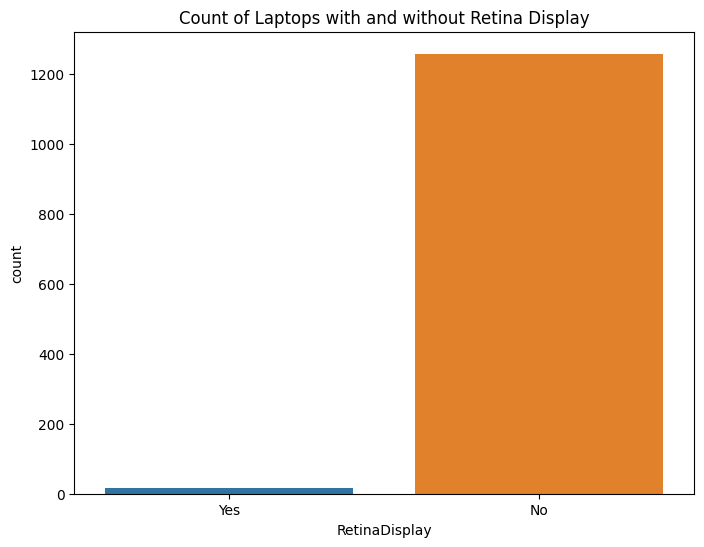

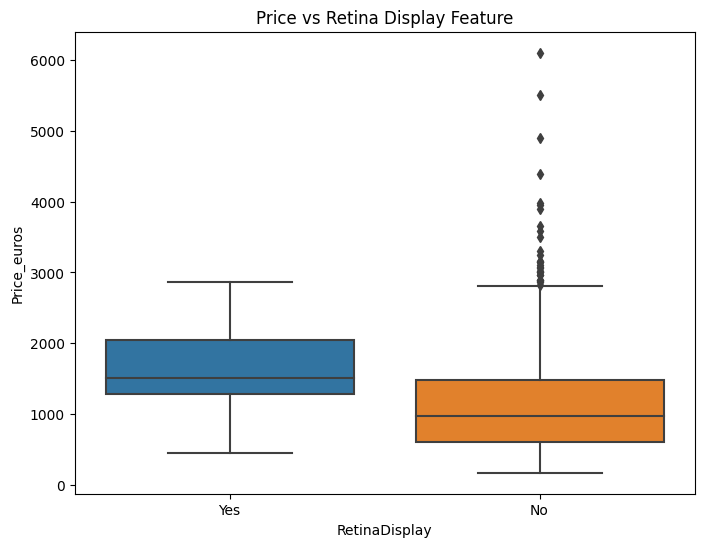

In [16]:
# Count of Retina Display Laptops
plt.figure(figsize=(8, 6))
sns.countplot(x='RetinaDisplay', data=df)
plt.title('Count of Laptops with and without Retina Display')
plt.show()

# Price Distribution based on Retina Display
plt.figure(figsize=(8, 6))
sns.boxplot(x='RetinaDisplay', y='Price_euros', data=df)
plt.title('Price vs Retina Display Feature')
plt.show()


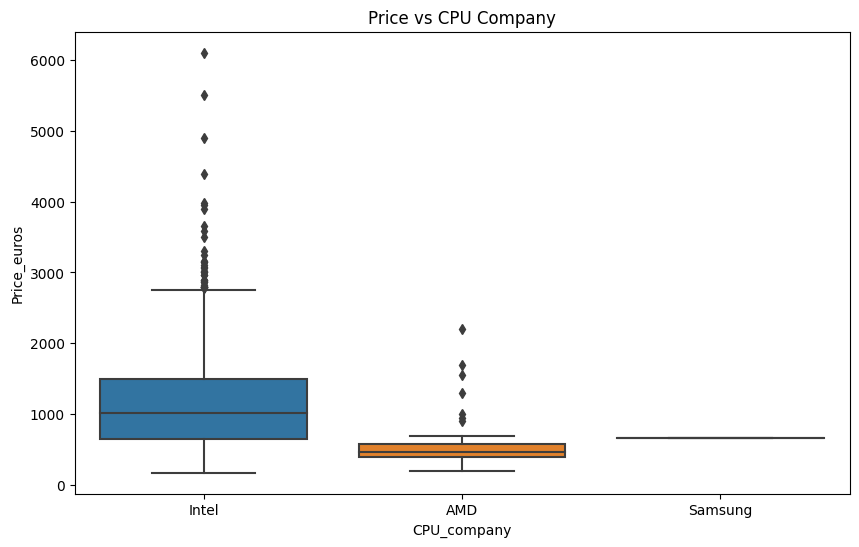

In [17]:
# Price vs CPU Company
plt.figure(figsize=(10, 6))
sns.boxplot(x='CPU_company', y='Price_euros', data=df)
plt.title('Price vs CPU Company')
plt.show()


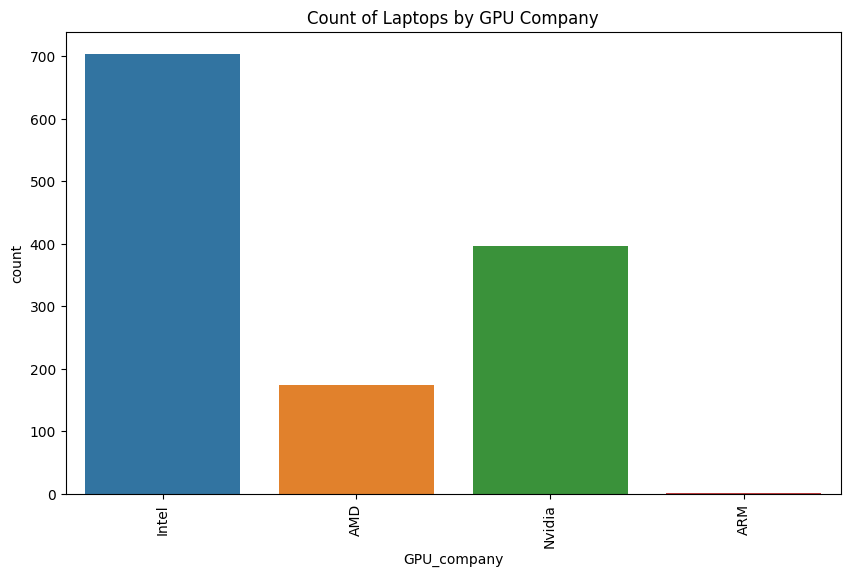

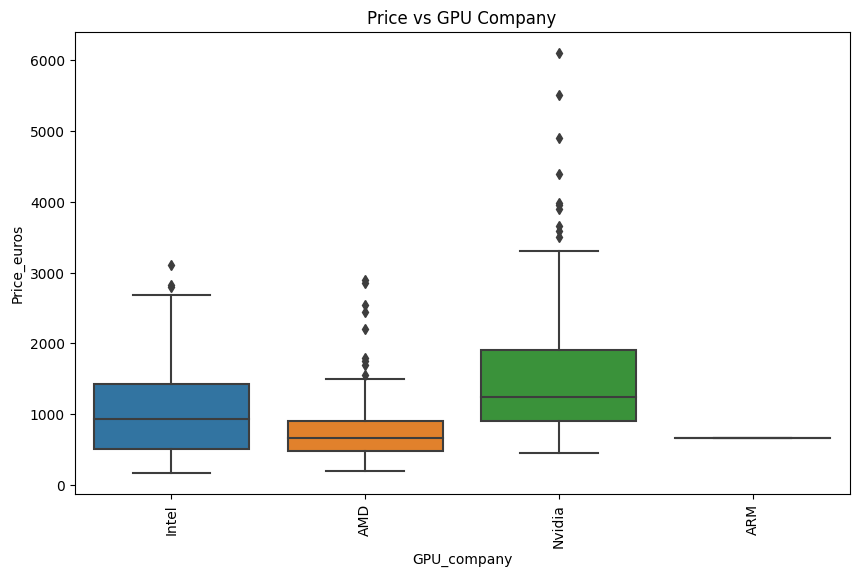

In [18]:
# Count of Laptops by GPU Company
plt.figure(figsize=(10, 6))
sns.countplot(x='GPU_company', data=df)
plt.xticks(rotation=90)
plt.title('Count of Laptops by GPU Company')
plt.show()

# Price vs GPU Company
plt.figure(figsize=(10, 6))
sns.boxplot(x='GPU_company', y='Price_euros', data=df)
plt.xticks(rotation=90)
plt.title('Price vs GPU Company')
plt.show()


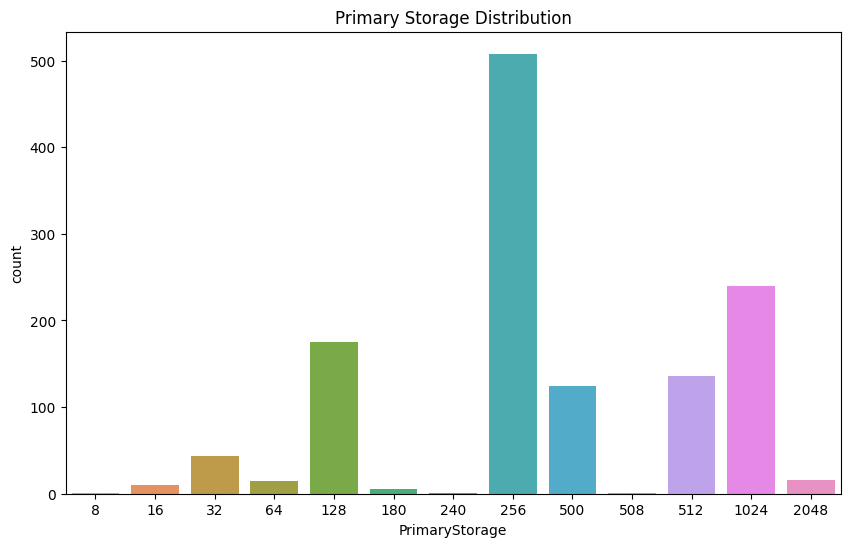

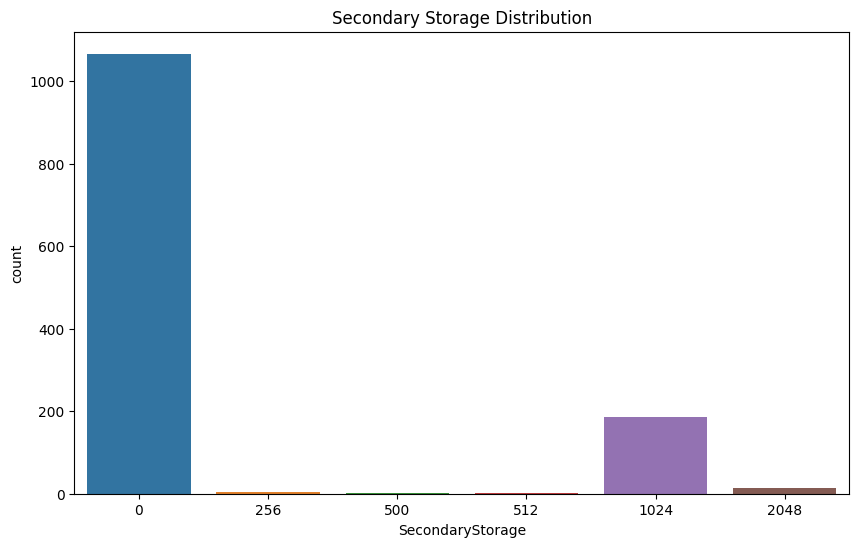

In [19]:
# Primary Storage Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='PrimaryStorage', data=df)
plt.title('Primary Storage Distribution')
plt.show()

# Secondary Storage Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='SecondaryStorage', data=df)
plt.title('Secondary Storage Distribution')
plt.show()


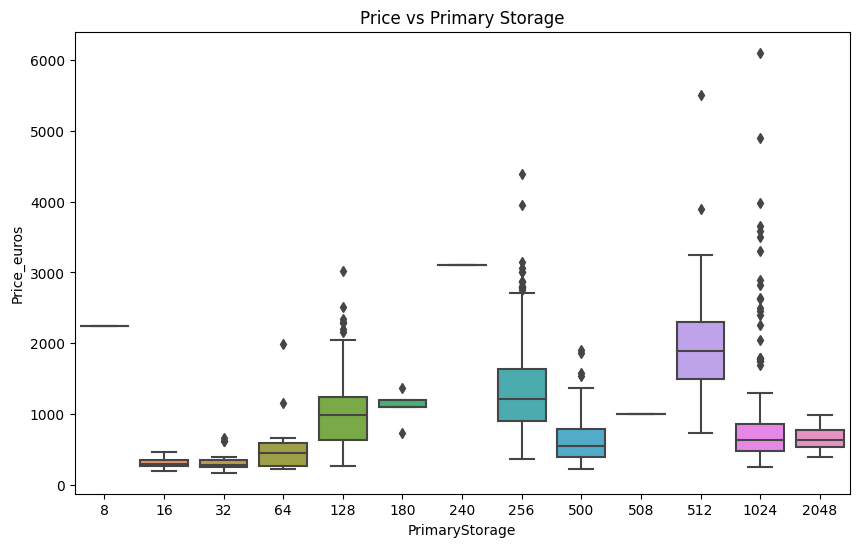

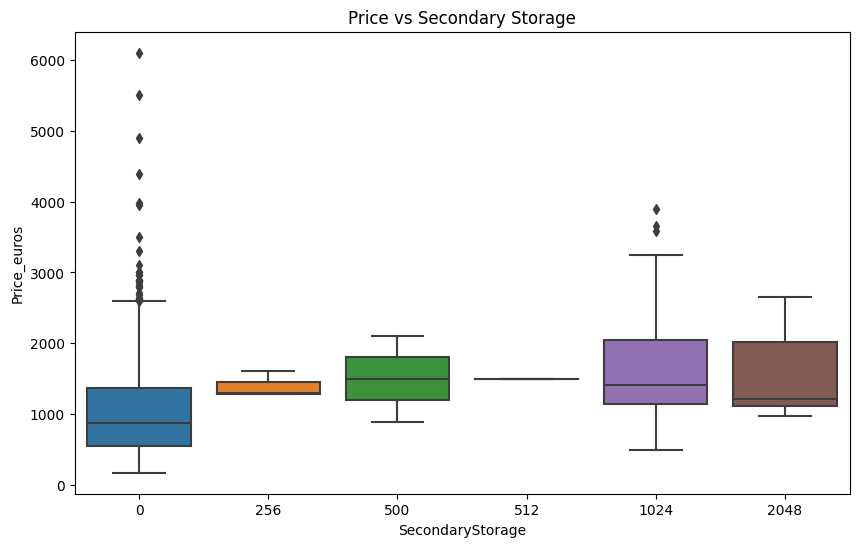

In [20]:
# Price vs Primary Storage
plt.figure(figsize=(10, 6))
sns.boxplot(x='PrimaryStorage', y='Price_euros', data=df)
plt.title('Price vs Primary Storage')
plt.show()

# Price vs Secondary Storage
plt.figure(figsize=(10, 6))
sns.boxplot(x='SecondaryStorage', y='Price_euros', data=df)
plt.title('Price vs Secondary Storage')
plt.show()


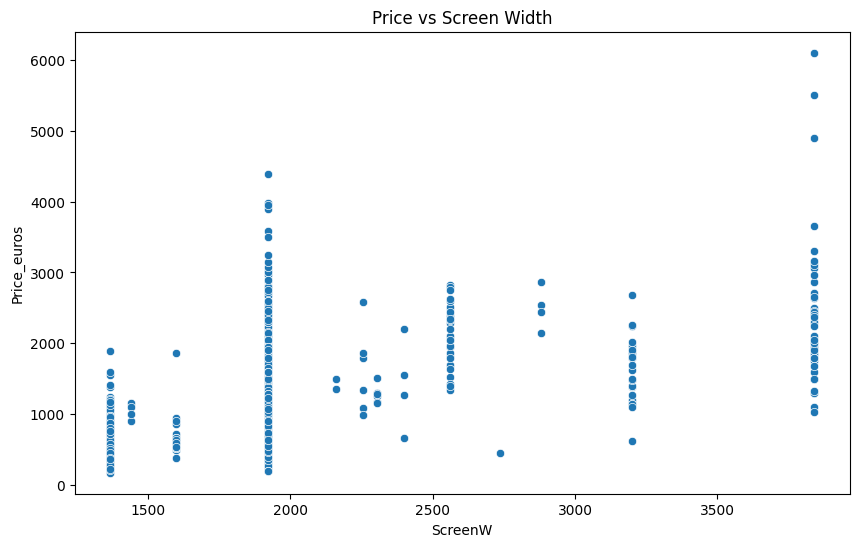

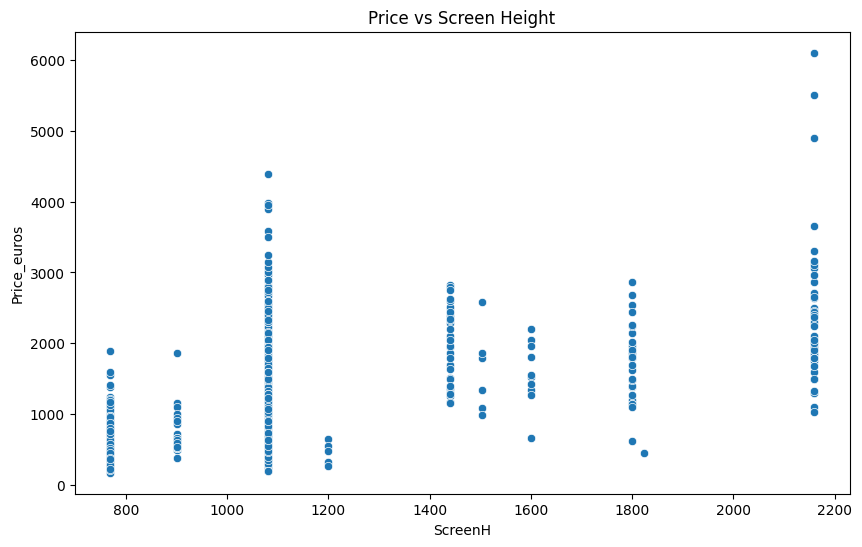

In [21]:
# Screen Width vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ScreenW', y='Price_euros', data=df)
plt.title('Price vs Screen Width')
plt.show()

# Screen Height vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ScreenH', y='Price_euros', data=df)
plt.title('Price vs Screen Height')
plt.show()


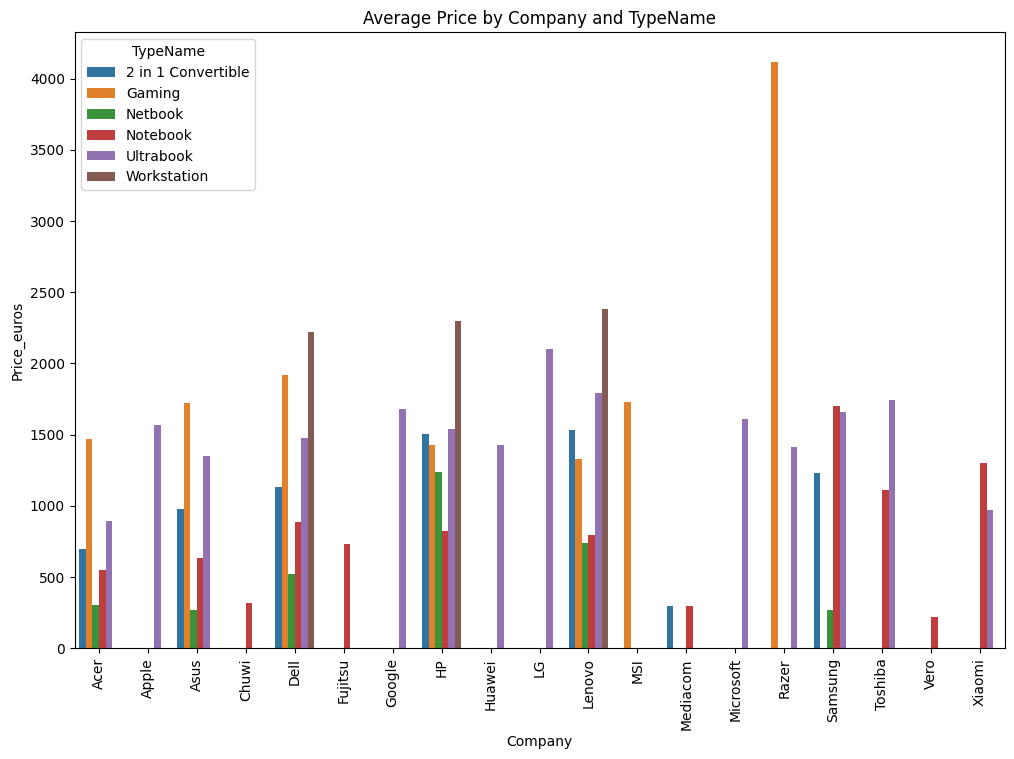

In [22]:
# Group by Company and TypeName to see average price
grouped_df = df.groupby(['Company', 'TypeName'])['Price_euros'].mean().reset_index()

# Visualize the average price by Company and TypeName
plt.figure(figsize=(12, 8))
sns.barplot(x='Company', y='Price_euros', hue='TypeName', data=grouped_df)
plt.xticks(rotation=90)
plt.title('Average Price by Company and TypeName')
plt.show()
